![My Logo](https://thoughtsociety.org/wp-content/uploads/2019/03/ts_notebook_header.png)

# Decision Trees and Random Forests

Using the **kyphosis dataset** will help us get a better understanding of Trees.  Random Forest is simply an ensemble version of a decision tree using many trees instead of one.

This simple dataset with 3 features and a target is based on a physical condition involving the curvature of the spine. 

### Dataset Description:

* **Kyphosis :  The condition being absent or present**
* **Age      :  in months**
* **Number   :  The number of vertebrae involved**
* **Start    :  The number of the first (topmost) vertebrae operated on.**

### We will first run the **DecisionTreeClassifier** and then the **RandomForestClassifier** from Scikitlearn


### Thanks to Kagglers and Jose Portilla for insights on this subject.

## Here is what we will be doing

1. **Read in kiphosis.csv** from my public github repo
2. Perform some simple **EDA**
3. Extract everything but the target from the dataframe into **'X'(Kyphosis)** 
4. Extract just the **target into 'y'**
5. **train_test_split** the data
6. Run **Decision_Tree_Classifier' fit on dtree**
7. Run **prediction** on same
8. Run **classification_report** for results
9. Run **confusion_matrix**  for results
10. Change to **RandomForestClassifier (rfc) and run steps 6,7, 8 and 9** for results

## Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thoughtsociety/ads_track4/master/datasets/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


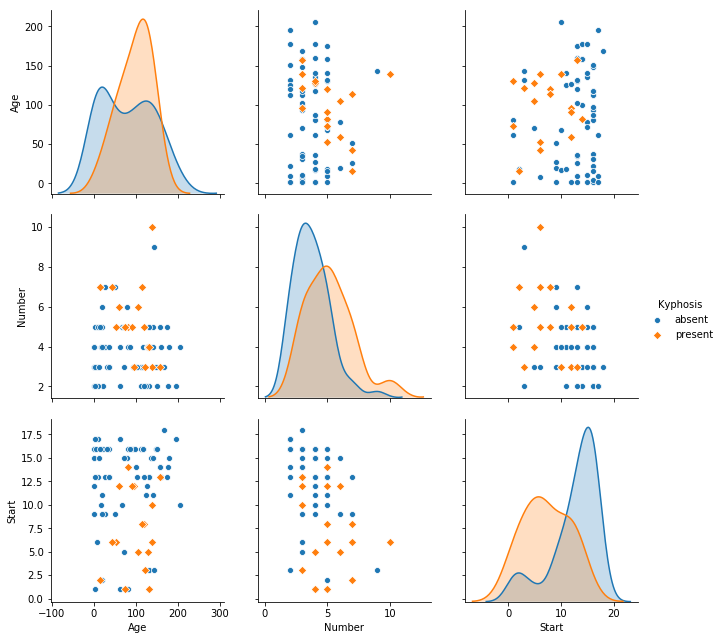

In [5]:
sns.pairplot(df,hue = 'Kyphosis',height = 3,markers=["o", "D"])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(['Kyphosis'],axis = 1)

In [8]:
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[16  4]
 [ 2  3]]


              precision    recall  f1-score   support

      absent       0.89      0.80      0.84        20
     present       0.43      0.60      0.50         5

    accuracy                           0.76        25
   macro avg       0.66      0.70      0.67        25
weighted avg       0.80      0.76      0.77        25



In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(n_estimators = 100,n_jobs=-1)

In [18]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[19  1]
 [ 2  3]]


              precision    recall  f1-score   support

      absent       0.90      0.95      0.93        20
     present       0.75      0.60      0.67         5

    accuracy                           0.88        25
   macro avg       0.83      0.77      0.80        25
weighted avg       0.87      0.88      0.87        25

